# Bias Variance Tradeoff

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import hashlib

In [2]:
def round_and_hash(value, precision=4, dtype=np.float32):
    """ 
    Function to round and hash a scalar or numpy array of scalars.
    Used to compare results with true solutions without spoiling the solution.
    """
    rounded = np.array([value], dtype=dtype).round(decimals=precision)
    hashed = hashlib.md5(rounded).hexdigest()
    return hashed

### Data Generation

In [3]:
def train_data():
    '''raise NotImplementedError()'''
    x = np.random.uniform(0, 2 * np.pi, 2)
    y = np.sin(x)
    return x, y


In [4]:
x_train, y_train  = train_data() 
print(x_train, y_train)

[5.1156034  4.90298605] [-0.91980449 -0.9818913 ]


In [5]:
# If implementation is correct, these tests should not throw an exception

assert len(x_train) == 2
assert len(y_train) == 2
np.testing.assert_array_equal(np.sin(x_train), y_train)
for i in range(1000):
    x_tmp, _ = train_data()
    assert x_tmp.min() >= 0.0
    assert x_tmp.max() <= 2*np.pi

### Hypothesis


$$\mathcal H_1: h_1(x) = \theta_0 + \theta_1 x$$

and 

$$\mathcal H_2: h_2(x) = w$$

In [6]:
def get_thetas(x, y):
    theta_1 = (y[1] - y[0]) / (x[1] - x[0])
    theta_0 = y[0] - theta_1 * x[0]
    return [theta_0, theta_1]
    
    

def get_w(x, y):
    w = (y[0] + y[1])/2.0
    return w

In [7]:
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
print(thetas[0], thetas[1])
print(w)

-2.4136219786577255 0.29201198327986744
-0.9508478916847839


In [8]:
# If implementation is correct, these tests should not throw an exception

x_train_temp = np.array([0,1])
y_train_temp = np.array([np.sin(x_i) for x_i in x_train_temp])
thetas_test = get_thetas(x_train_temp, y_train_temp)
w_test = get_w(x_train_temp, y_train_temp)

np.testing.assert_almost_equal(thetas_test[0], 0.0)
np.testing.assert_almost_equal(thetas_test[1], 0.8414709848078965)
np.testing.assert_almost_equal(w_test, 0.42073549240394825)

In [9]:
def get_hypothesis_1(thetas):
    return lambda x: thetas[0] + thetas[1] * x
    
def get_hypothesis_2(w):
    return lambda x: w * np.ones((len(x)))

In [10]:
x_grid = np.linspace(0, 2*np.pi, 100)
y_grid = np.sin(x_grid)

In [11]:
# If implementation is correct, these tests should not throw an exception

h1_test = get_hypothesis_1(thetas_test)
h2_test = get_hypothesis_2(w_test)
np.testing.assert_almost_equal(h1_test(x_grid)[10], 0.5340523361780719)
np.testing.assert_almost_equal(h2_test(x_grid)[10], 0.42073549240394825)

In [12]:
def plot_true_target_function_x_y_h1_h2(x, y, hypothesis1, hypothesis2):
    x_sin = np.linspace(0, 2*np.pi, 100)
    y_sin = np.sin(x_sin)
    x1 = x_sin
    y1 = hypothesis1 (x1)
    x2 = x_sin
    y2 = hypothesis2 (x2)
    
    
    
    fig, ax = plt.subplots(figsize = (8,8))
    ax.plot(x_sin, y_sin, c = 'b', label = 'target sin(x)')
    ax.plot(x1, y1, c = (0., 1., 1.), label = 'H1')
    ax.plot(x2, y2, c = (0., 1., 0.3), label = 'H2')
    ax.scatter(x ,y , 50, marker = "o", c ='fuchsia')
    
    ax.legend(loc ='upper right')
    plt.xlim(0, 7)
    plt.ylim(-3, 3)
    
    

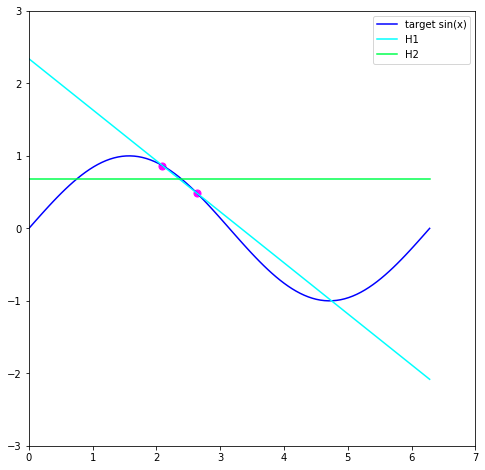

In [188]:
x_train, y_train  = train_data() 
thetas = get_thetas(x_train, y_train)
w = get_w(x_train, y_train)
plot_true_target_function_x_y_h1_h2(x_train, y_train, get_hypothesis_1(thetas), get_hypothesis_2(w))

### Out of Sample Error

In [13]:
def out_of_sample_error(y_preds, y):
    m = len(y)
    return 1./ m * ((y_preds - y) ** 2).sum()


In [14]:
# If implementation is correct, these tests should not throw an exception

e_out_h1_test = out_of_sample_error(h1_test(x_grid), y_grid)
np.testing.assert_almost_equal(e_out_h1_test, 11.525485917588728)

In [15]:
def run_experiment(m, x_grid, y_grid):
    xs = np.ndarray((m,2))
    ys = np.ndarray((m,2))
    t0s = np.ndarray(m)
    t1s = np.ndarray(m)
    ws = np.ndarray(m)
    e_out_h1s = np.ndarray(m)
    e_out_h2s = np.ndarray(m)
    
    for i in range (m):
        xs[i], ys[i] = train_data()
        t0s[i] = get_thetas(xs[i], ys[i])[0]
        t1s[i] = get_thetas(xs[i], ys[i])[1]
        ws[i] = get_w(xs[i], ys[i])
        e_out_h1s[i] = out_of_sample_error(get_hypothesis_1([t0s[i], t1s[i]])(x_grid), y_grid)
        e_out_h2s[i] = out_of_sample_error(get_hypothesis_2(ws[i])(x_grid), y_grid)    
    
    return xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s

In [16]:
x_grid.shape

(100,)

In [17]:
xs, ys, t0s, t1s, ws, e_out_h1s, e_out_h2s = run_experiment(10000, x_grid, y_grid)

In [18]:
t0_avg = t0s.mean()
t1_avg = t1s.mean()
thetas_avg = [t0_avg, t1_avg]
w_avg = ws.mean()
h1_avg = get_hypothesis_1(thetas_avg)
h2_avg = get_hypothesis_2(w_avg)
print(thetas_avg)

[0.7529453225973605, -0.24173852314904917]


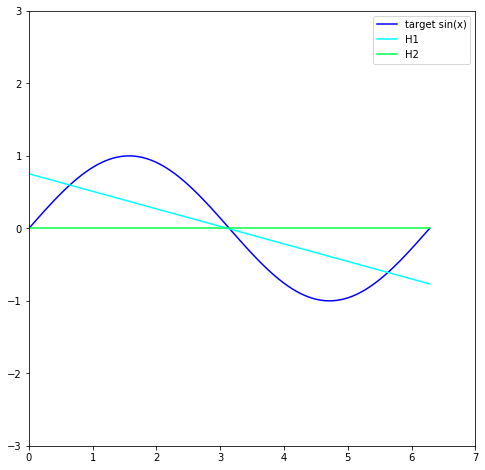

In [19]:
plot_true_target_function_x_y_h1_h2([], [], h1_avg, h2_avg)

In [20]:
expectation_Eout_1 = e_out_h1s.mean()
print ("expectation of E_out of model 1:", expectation_Eout_1)

expectation of E_out of model 1: 1.9340557758700099


In [21]:
expectation_Eout_2 = e_out_h2s.mean()
print ("expectation of E_out of model 2:", expectation_Eout_2)

expectation of E_out of model 2: 0.7455047700661271


### Bias

The bias for the mean-squared error is:
$$
bias^2 = \mathbb E_{x,y} \left[(\tilde h(x) - y)^2\right]
$$


The expectation w.r.t. $y$ vanishes if we have no noise:

$$
bias^2 = \mathbb E_x \left[(\tilde h(x) - t(x))^2\right]
$$


In [22]:
def bias_square(y_true, y_avg):
    """
     Returns the bias^2 of a hypothesis set for the sin-example.

            Parameters:
                    y_true(np.array): The y-values of the target function
                                      at each position on the x_grid
                    y_avg(np.array): The y-values of the avg hypothesis 
                                     at each position on the x_grid

            Returns:
                    variance (double):  Bias^2 of the hypothesis set
    """
    m = len(y_true)
    return 1./ m * ((y_true - y_avg) ** 2).sum()

In [23]:
bias_1 = bias_square(y_grid,  h1_avg(x_grid))
print ("Bias of model 1:", bias_1)

Bias of model 1: 0.21269621828918944


In [24]:
bias_2 = bias_square(y_grid,  h2_avg(x_grid))
print ("Bias of model 2:", bias_2)

Bias of model 2: 0.49500052698844677


### Variance

Variance for the mean-squared-error:

$$
variance = \mathbb E_D \left[ \mathbb E_x \left[\left(h^D(x) - \tilde h(x)\right)^2 \right] \right]
$$

In [25]:
def variances(hypothesis_func, param_func, xs, ys, x_grid, y_avg):
    '''
    Returns the variance of a hypothesis set for the sin-example.

            Parameters:
                    hypothesis_func (function): The hypothesis function 1 or 2
                    param_func (function): the function to calculate the parameters
                            from the training data, i.e., get_theta or get_w 
                    xs(np.array): 2D-Array with different training data values for x
                                first dimension: differerent training data sets
                                second dimension: data points in a data set
                    ys(np.array): 2D-Array with different training data values for y
                                first dimension: differerent training data sets
                                second dimension: data points in a data set
                    x_grid(np.array): The x-values for calculating the expectation E_x
                    y_avg(np.array): The y-values of the average hypothesis at the 
                                     positions of x_grid

            Returns:
                    variance (double):  Variance of the hypothesis set for 
                                        a type for training data 
                                        (here two examples per training data set)
    
    return variance
    '''
    variance = np.ndarray(len(xs))
    
    for i in range(len(xs)):
        thetas = param_func(xs[i], ys[i])
        hypothesis = hypothesis_func(thetas)
        y_ = hypothesis(x_grid)
        variance[i] = 1. / len (y_) * ((y_ - y_avg) ** 2).sum()
    
    return variance
    
    

In [26]:
var_hypothesis_set_1 = variances(get_hypothesis_1, 
                 get_thetas, 
                 xs, ys, 
                 x_grid, 
                 h1_avg(x_grid))
print(var_hypothesis_set_1)

[0.25887347 0.00343892 0.07533855 ... 1.79810378 0.30893301 0.43274302]


In [27]:
var_hypothesis_set_2 = variances(get_hypothesis_2, 
                 get_w, 
                 xs, ys, 
                 x_grid, 
                 h2_avg(x_grid))
print(var_hypothesis_set_2)

[4.70887493e-02 3.72567361e-04 1.17218271e-01 ... 5.26202797e-04
 3.42560242e-04 5.30414853e-01]


In [28]:
print("model 1: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_1, bias_1, var_hypothesis_set_1.sum()/len(var_hypothesis_set_1)))
print("model 2: E_out ≈ bias^2 + variance:  %f ≈ %f + %f" % (expectation_Eout_2, bias_2, var_hypothesis_set_2.sum()/len(var_hypothesis_set_2)))

model 1: E_out ≈ bias^2 + variance:  1.934056 ≈ 0.212696 + 1.721360
model 2: E_out ≈ bias^2 + variance:  0.745505 ≈ 0.495001 + 0.250504
